In [1]:
import pandas as pd
import numpy as np

# विद्यार्थ्यांच्या माहितीचा एक काल्पनिक डेटाफ्रेम, ज्यात काही गहाळ माहिती आहे
student_records = {
    'roll_no': [101, 102, 103, 104, 105, 106, 107, 108],
    'name': ['Aarav', 'Ishani', 'Vihaan', 'Myra', 'Arjun', 'Diya', 'Kabir', 'Anika'],
    'age': [18, 19, 18, 17, np.nan, 19, 18, 17],
    'attendance_percentage': [92.5, 88.0, 75.3, np.nan, 95.8, 81.0, 91.0, 89.5],
    'exam_score': [85, 91, 72, 65, 88, 79, np.nan, np.nan]
}
df = pd.DataFrame(student_records)

print("Original Student Records Dataframe:\n")
print(df)

Original Student Records Dataframe:

   roll_no    name   age  attendance_percentage  exam_score
0      101   Aarav  18.0                   92.5        85.0
1      102  Ishani  19.0                   88.0        91.0
2      103  Vihaan  18.0                   75.3        72.0
3      104    Myra  17.0                    NaN        65.0
4      105   Arjun   NaN                   95.8        88.0
5      106    Diya  19.0                   81.0        79.0
6      107   Kabir  18.0                   91.0         NaN
7      108   Anika  17.0                   89.5         NaN


In [2]:
# प्रत्येक स्तंभातील गहाळ व्हॅल्यूजची संख्या मोजणे
print("\nNumber of missing values in each column:\n")
print(df.isnull().sum())



Number of missing values in each column:

roll_no                  0
name                     0
age                      1
attendance_percentage    1
exam_score               2
dtype: int64


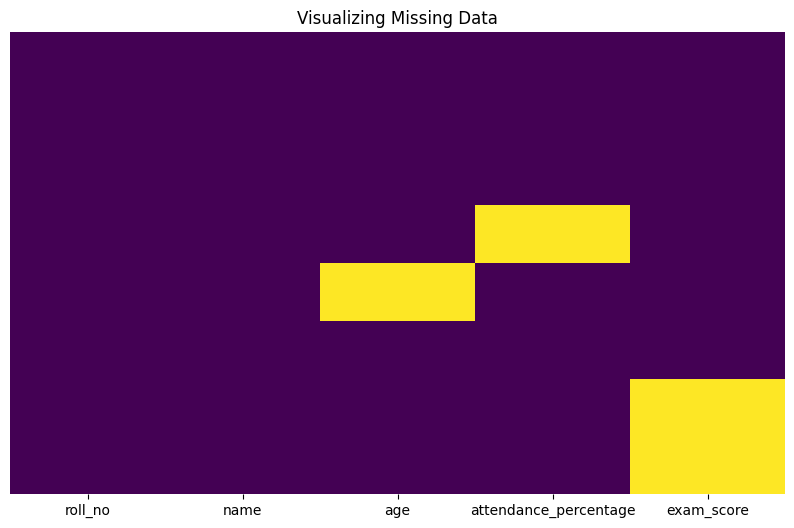

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# गहाळ माहितीचे व्हिज्युअलायझेशन
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Visualizing Missing Data")
plt.show()

In [4]:
# ज्या ओळींमध्ये NaN आहे, त्या काढून टाकणे
df_dropped_rows = df.dropna()
print("Dataframe after dropping rows with any missing value:\n")
print(df_dropped_rows)

Dataframe after dropping rows with any missing value:

   roll_no    name   age  attendance_percentage  exam_score
0      101   Aarav  18.0                   92.5        85.0
1      102  Ishani  19.0                   88.0        91.0
2      103  Vihaan  18.0                   75.3        72.0
5      106    Diya  19.0                   81.0        79.0


In [5]:
# 'exam_score' हा स्तंभ काढून टाकणे
df_dropped_cols = df.drop(columns=['exam_score'])
print("\nDataframe after dropping 'exam_score' column:\n")
print(df_dropped_cols.head()) # .head() वापरून पहिले काही रेकॉर्ड्स पाहूया


Dataframe after dropping 'exam_score' column:

   roll_no    name   age  attendance_percentage
0      101   Aarav  18.0                   92.5
1      102  Ishani  19.0                   88.0
2      103  Vihaan  18.0                   75.3
3      104    Myra  17.0                    NaN
4      105   Arjun   NaN                   95.8


In [6]:
# 'exam_score' मधील NaN ला 0 ने भरणे
df_filled_zero = df.copy() # मूळ df मध्ये बदल टाळण्यासाठी कॉपी करणे
df_filled_zero['exam_score'] = df_filled_zero['exam_score'].fillna(0)
print("Filling missing scores with 0:\n")
print(df_filled_zero)

Filling missing scores with 0:

   roll_no    name   age  attendance_percentage  exam_score
0      101   Aarav  18.0                   92.5        85.0
1      102  Ishani  19.0                   88.0        91.0
2      103  Vihaan  18.0                   75.3        72.0
3      104    Myra  17.0                    NaN        65.0
4      105   Arjun   NaN                   95.8        88.0
5      106    Diya  19.0                   81.0        79.0
6      107   Kabir  18.0                   91.0         0.0
7      108   Anika  17.0                   89.5         0.0


In [7]:
# 'attendance_percentage' ची सरासरी काढणे
attendance_mean = df['attendance_percentage'].mean()
print(f"Mean attendance: {attendance_mean:.2f}%")

# सरासरीने जागा भरणे
df_filled_mean = df.copy()
df_filled_mean['attendance_percentage'].fillna(attendance_mean, inplace=True)
print("\nFilling missing attendance with mean:\n")
print(df_filled_mean)

Mean attendance: 87.59%

Filling missing attendance with mean:

   roll_no    name   age  attendance_percentage  exam_score
0      101   Aarav  18.0              92.500000        85.0
1      102  Ishani  19.0              88.000000        91.0
2      103  Vihaan  18.0              75.300000        72.0
3      104    Myra  17.0              87.585714        65.0
4      105   Arjun   NaN              95.800000        88.0
5      106    Diya  19.0              81.000000        79.0
6      107   Kabir  18.0              91.000000         NaN
7      108   Anika  17.0              89.500000         NaN


In [8]:
# 'age' स्तंभाचा मध्यक काढणे
age_median = df['age'].median()
print(f"Median age: {age_median}")

# मध्यकाने जागा भरणे
df_filled_median = df_filled_mean.copy() # आधीचा डेटाफ्रेम वापरूया
df_filled_median['age'].fillna(age_median, inplace=True)
print("\nFilling missing age with median:\n")
print(df_filled_median)

Median age: 18.0

Filling missing age with median:

   roll_no    name   age  attendance_percentage  exam_score
0      101   Aarav  18.0              92.500000        85.0
1      102  Ishani  19.0              88.000000        91.0
2      103  Vihaan  18.0              75.300000        72.0
3      104    Myra  17.0              87.585714        65.0
4      105   Arjun  18.0              95.800000        88.0
5      106    Diya  19.0              81.000000        79.0
6      107   Kabir  18.0              91.000000         NaN
7      108   Anika  17.0              89.500000         NaN


In [9]:
# 'age' स्तंभाचा मध्यक काढणे
age_median = df['age'].median()
print(f"Median age: {age_median}")

# मध्यकाने जागा भरणे
df_filled_median = df_filled_mean.copy() # आधीचा डेटाफ्रेम वापरूया
df_filled_median['age'].fillna(age_median, inplace=True)
print("\nFilling missing age with median:\n")
print(df_filled_median)

Median age: 18.0

Filling missing age with median:

   roll_no    name   age  attendance_percentage  exam_score
0      101   Aarav  18.0              92.500000        85.0
1      102  Ishani  19.0              88.000000        91.0
2      103  Vihaan  18.0              75.300000        72.0
3      104    Myra  17.0              87.585714        65.0
4      105   Arjun  18.0              95.800000        88.0
5      106    Diya  19.0              81.000000        79.0
6      107   Kabir  18.0              91.000000         NaN
7      108   Anika  17.0              89.500000         NaN


In [10]:
import pandas as pd

# डुप्लिकेट नोंदी असलेला एक डेटाफ्रेम
orders_data = {
    'order_id': [1, 2, 3, 4, 2, 5, 6],
    'customer_id': ['C101', 'C102', 'C103', 'C104', 'C102', 'C105', 'C101'],
    'product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Mouse', 'Webcam', 'Laptop'],
    'amount': [75000, 1200, 2500, 15000, 1200, 4000, 75000]
}
orders_df = pd.DataFrame(orders_data)
print("Original Orders Dataframe:\n")
print(orders_df)

Original Orders Dataframe:

   order_id customer_id   product  amount
0         1        C101    Laptop   75000
1         2        C102     Mouse    1200
2         3        C103  Keyboard    2500
3         4        C104   Monitor   15000
4         2        C102     Mouse    1200
5         5        C105    Webcam    4000
6         6        C101    Laptop   75000


In [11]:
# डुप्लिकेट नोंदी शोधणे
print("\nIdentifying duplicate rows:\n")
print(orders_df.duplicated())


Identifying duplicate rows:

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool


In [12]:
df_no_duplicates = orders_df.drop_duplicates()
print("\nDataframe after dropping exact duplicates:\n")
print(df_no_duplicates)


Dataframe after dropping exact duplicates:

   order_id customer_id   product  amount
0         1        C101    Laptop   75000
1         2        C102     Mouse    1200
2         3        C103  Keyboard    2500
3         4        C104   Monitor   15000
5         5        C105    Webcam    4000
6         6        C101    Laptop   75000


In [13]:
# customer_id, product, आणि amount या स्तंभांच्या आधारावर डुप्लिकेट शोधणे
df_no_logical_duplicates = orders_df.drop_duplicates(subset=['customer_id', 'product', 'amount'])
print("\nDataframe after dropping logical duplicates:\n")
print(df_no_logical_duplicates)


Dataframe after dropping logical duplicates:

   order_id customer_id   product  amount
0         1        C101    Laptop   75000
1         2        C102     Mouse    1200
2         3        C103  Keyboard    2500
3         4        C104   Monitor   15000
5         5        C105    Webcam    4000


In [14]:
import pandas as pd

# चुकीचे डेटा टाइप्स असलेला एक काल्पनिक डेटाफ्रेम
product_sales_data = {
    'order_id': [1001, 1002, 1003, 1004],
    'order_date': ['10-06-2025', '11-06-2025', '11-06-2025', '12-06-2025'],
    'product_id': ['P58', 'P92', 'P65', 'P58'],
    'price': ['₹ 1,500', '₹ 850', '₹ 2,200', '₹ 1,550'],
    'quantity': ['2', '1', '3', '1']
}
sales_df = pd.DataFrame(product_sales_data)

print("Original Dataframe with incorrect data types:\n")
sales_df.info()

Original Dataframe with incorrect data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    4 non-null      int64 
 1   order_date  4 non-null      object
 2   product_id  4 non-null      object
 3   price       4 non-null      object
 4   quantity    4 non-null      object
dtypes: int64(1), object(4)
memory usage: 288.0+ bytes


In [15]:
# एक नवीन, स्वच्छ डेटाफ्रेम तयार करणे
clean_sales_df = sales_df.copy()

# 'price' स्तंभातील चिन्हे काढून टाकणे
clean_sales_df['price'] = clean_sales_df['price'].str.replace('₹', '').str.replace(',', '')

print("Price column after removing symbols:\n")
print(clean_sales_df['price'])

Price column after removing symbols:

0     1500
1      850
2     2200
3     1550
Name: price, dtype: object


In [16]:
# 'price' आणि 'quantity' स्तंभांना संख्यात्मक रूपात बदलणे
clean_sales_df['price'] = clean_sales_df['price'].astype(float)
clean_sales_df['quantity'] = clean_sales_df['quantity'].astype(int)

print("\nDataframe after correcting data types:\n")
clean_sales_df.info()


Dataframe after correcting data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    4 non-null      int64  
 1   order_date  4 non-null      object 
 2   product_id  4 non-null      object 
 3   price       4 non-null      float64
 4   quantity    4 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 288.0+ bytes


In [17]:
# एकूण विक्रीसाठी नवीन स्तंभ तयार करणे
clean_sales_df['total_sale'] = clean_sales_df['price'] * clean_sales_df['quantity']
print("\nDataframe with total_sale column:\n")
print(clean_sales_df)


Dataframe with total_sale column:

   order_id  order_date product_id   price  quantity  total_sale
0      1001  10-06-2025        P58  1500.0         2      3000.0
1      1002  11-06-2025        P92   850.0         1       850.0
2      1003  11-06-2025        P65  2200.0         3      6600.0
3      1004  12-06-2025        P58  1550.0         1      1550.0


In [18]:
# 'order_date' स्तंभाला datetime रूपात बदलणे
clean_sales_df['order_date'] = pd.to_datetime(clean_sales_df['order_date'], format='%d-%m-%Y')

print("\nDataframe after converting date column:\n")
clean_sales_df.info()


Dataframe after converting date column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    4 non-null      int64         
 1   order_date  4 non-null      datetime64[ns]
 2   product_id  4 non-null      object        
 3   price       4 non-null      float64       
 4   quantity    4 non-null      int64         
 5   total_sale  4 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 320.0+ bytes


In [20]:
# तारखेमधून नवीन स्तंभ तयार करणे
clean_sales_df['order_month'] = clean_sales_df['order_date'].dt.month_name()
clean_sales_df['order_day_of_week'] = clean_sales_df['order_date'].dt.day_name()

print("\nDataframe with new date-based columns:\n")
print(clean_sales_df)


Dataframe with new date-based columns:

   order_id order_date product_id   price  quantity  total_sale order_month  \
0      1001 2025-06-10        P58  1500.0         2      3000.0        June   
1      1002 2025-06-11        P92   850.0         1       850.0        June   
2      1003 2025-06-11        P65  2200.0         3      6600.0        June   
3      1004 2025-06-12        P58  1550.0         1      1550.0        June   

  order_day_of_week  
0           Tuesday  
1         Wednesday  
2         Wednesday  
3          Thursday  


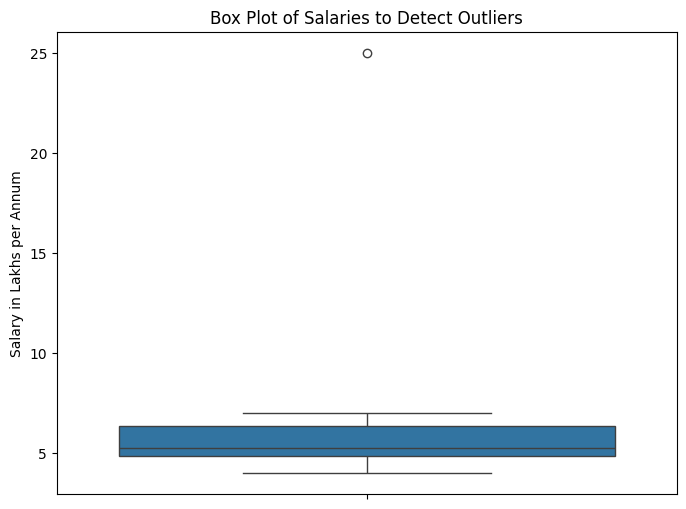

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# काही काल्पनिक पगारांचा डेटा, ज्यात आउटलायर्स आहेत
salary_data = {'salary_in_lakhs': [4, 5, 4.5, 6, 5.5, 6.5, 7, 5, 4.8, 25]}
salary_df = pd.DataFrame(salary_data)

plt.figure(figsize=(8, 6))
sns.boxplot(y=salary_df['salary_in_lakhs'])
plt.title("Box Plot of Salaries to Detect Outliers")
plt.ylabel("Salary in Lakhs per Annum")
plt.show()

In [22]:
import numpy as np

# पगाराच्या डेटासाठी झेड-स्कोअर काढूया
mean_salary = salary_df['salary_in_lakhs'].mean()
std_salary = salary_df['salary_in_lakhs'].std()

salary_df['z_score'] = (salary_df['salary_in_lakhs'] - mean_salary) / std_salary
print("Salaries with their Z-scores:\n")
print(salary_df)

# झेड-स्कोअरच्या आधारावर आउटलायर्स शोधणे
outliers_z = salary_df[salary_df['z_score'].abs() > 2] # आपण 2 चा थ्रेशोल्ड वापरूया
print("\nOutliers detected using Z-score (threshold=2):\n")
print(outliers_z)

Salaries with their Z-scores:

   salary_in_lakhs   z_score
0              4.0 -0.530587
1              5.0 -0.371252
2              4.5 -0.450919
3              6.0 -0.211916
4              5.5 -0.291584
5              6.5 -0.132248
6              7.0 -0.052581
7              5.0 -0.371252
8              4.8 -0.403119
9             25.0  2.815458

Outliers detected using Z-score (threshold=2):

   salary_in_lakhs   z_score
9             25.0  2.815458


In [23]:
# IQR पद्धतीने आउटलायर्स ओळखणे
Q1 = salary_df['salary_in_lakhs'].quantile(0.25)
Q3 = salary_df['salary_in_lakhs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

outliers_iqr = salary_df[(salary_df['salary_in_lakhs'] < lower_bound) | (salary_df['salary_in_lakhs'] > upper_bound)]
print("\nOutliers detected using IQR method:\n")
print(outliers_iqr)


Q1: 4.85, Q3: 6.375, IQR: 1.5250000000000004
Lower Bound: 2.56, Upper Bound: 8.66

Outliers detected using IQR method:

   salary_in_lakhs   z_score
9             25.0  2.815458


In [24]:
import pandas as pd

# काल्पनिक प्रतिक्रियांचा डेटाफ्रेम
reviews_data = {
    'review_text': [
        'The delivery was very fast and the product is excellent!!',
        'Poor quality product, do not buy this.',
        'An okay-ish product, but the delivery was late.',
        'AMAZING experience! Loved it... Will recommend to everyone.',
        'product not working after 2 days. #WasteOfMoney'
    ]
}
reviews_df = pd.DataFrame(reviews_data)
print("Original Reviews Dataframe:\n")
print(reviews_df)

Original Reviews Dataframe:

                                         review_text
0  The delivery was very fast and the product is ...
1             Poor quality product, do not buy this.
2    An okay-ish product, but the delivery was late.
3  AMAZING experience! Loved it... Will recommend...
4    product not working after 2 days. #WasteOfMoney


In [25]:
# सर्व मजकूर लहान लिपीत करणे
reviews_df['clean_text'] = reviews_df['review_text'].str.lower()
print("\nAfter converting to lowercase:\n")
print(reviews_df)



After converting to lowercase:

                                         review_text  \
0  The delivery was very fast and the product is ...   
1             Poor quality product, do not buy this.   
2    An okay-ish product, but the delivery was late.   
3  AMAZING experience! Loved it... Will recommend...   
4    product not working after 2 days. #WasteOfMoney   

                                          clean_text  
0  the delivery was very fast and the product is ...  
1             poor quality product, do not buy this.  
2    an okay-ish product, but the delivery was late.  
3  amazing experience! loved it... will recommend...  
4    product not working after 2 days. #wasteofmoney  


In [26]:
# विरामचिन्हे आणि संख्या काढून टाकणे
# [^\w\s] म्हणजे 'अक्षरे आणि स्पेस सोडून बाकी सर्व काही'
reviews_df['clean_text'] = reviews_df['clean_text'].str.replace(r'[^\w\s]', '', regex=True)
# संख्या काढून टाकणे
reviews_df['clean_text'] = reviews_df['clean_text'].str.replace(r'\d+', '', regex=True)

print("\nAfter removing punctuation and numbers:\n")
print(reviews_df['clean_text'])


After removing punctuation and numbers:

0    the delivery was very fast and the product is ...
1                 poor quality product do not buy this
2         an okayish product but the delivery was late
3    amazing experience loved it will recommend to ...
4         product not working after  days wasteofmoney
Name: clean_text, dtype: object


In [27]:
# वाक्यांना शब्दांच्या लिस्टमध्ये रूपांतरित करणे
reviews_df['tokenized_text'] = reviews_df['clean_text'].str.split()
print("\nAfter tokenizing the text:\n")
print(reviews_df[['review_text', 'tokenized_text']])


After tokenizing the text:

                                         review_text  \
0  The delivery was very fast and the product is ...   
1             Poor quality product, do not buy this.   
2    An okay-ish product, but the delivery was late.   
3  AMAZING experience! Loved it... Will recommend...   
4    product not working after 2 days. #WasteOfMoney   

                                      tokenized_text  
0  [the, delivery, was, very, fast, and, the, pro...  
1       [poor, quality, product, do, not, buy, this]  
2  [an, okayish, product, but, the, delivery, was...  
3  [amazing, experience, loved, it, will, recomme...  
4  [product, not, working, after, days, wasteofmo...  


In [28]:
import nltk
# nltk.download('stopwords') # हे एकदाच चालवावे लागते

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# स्टॉप वर्ड्स काढून टाकण्यासाठी एक फंक्शन
def remove_stopwords(text_tokens):
    filtered_tokens = [word for word in text_tokens if word not in stop_words]
    return filtered_tokens

reviews_df['stopwords_removed'] = reviews_df['tokenized_text'].apply(remove_stopwords)
print("\nAfter removing stop words:\n")
print(reviews_df[['review_text', 'stopwords_removed']])


After removing stop words:

                                         review_text  \
0  The delivery was very fast and the product is ...   
1             Poor quality product, do not buy this.   
2    An okay-ish product, but the delivery was late.   
3  AMAZING experience! Loved it... Will recommend...   
4    product not working after 2 days. #WasteOfMoney   

                                   stopwords_removed  
0               [delivery, fast, product, excellent]  
1                      [poor, quality, product, buy]  
2                 [okayish, product, delivery, late]  
3  [amazing, experience, loved, recommend, everyone]  
4             [product, working, days, wasteofmoney]  


In [29]:
import nltk
# nltk.download('wordnet') # हे एकदाच चालवावे लागते

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text_tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text_tokens]
    return lemmatized_tokens

reviews_df['lemmatized_text'] = reviews_df['stopwords_removed'].apply(lemmatize_text)
print("\nAfter lemmatization:\n")
print(reviews_df[['review_text', 'lemmatized_text']])


After lemmatization:

                                         review_text  \
0  The delivery was very fast and the product is ...   
1             Poor quality product, do not buy this.   
2    An okay-ish product, but the delivery was late.   
3  AMAZING experience! Loved it... Will recommend...   
4    product not working after 2 days. #WasteOfMoney   

                                     lemmatized_text  
0               [delivery, fast, product, excellent]  
1                      [poor, quality, product, buy]  
2                 [okayish, product, delivery, late]  
3  [amazing, experience, loved, recommend, everyone]  
4              [product, working, day, wasteofmoney]  


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ऑर्डिनल डेटा असलेले एक उदाहरण
edu_df = pd.DataFrame({
    'education_level': ['Graduate', 'Post Graduate', 'High School', 'Graduate', 'Post Graduate']
})

# योग्य क्रम ठरवणे
education_order = ['High School', 'Graduate', 'Post Graduate']
edu_df['education_level'] = pd.Categorical(edu_df['education_level'], categories=education_order, ordered=True)

# आता लेबल एन्कोडिंग करू शकतो (येथे आपण Pandas चे .cat.codes वापरूया)
edu_df['education_encoded'] = edu_df['education_level'].cat.codes
print("Label Encoding for Ordinal Data:\n")
print(edu_df)

Label Encoding for Ordinal Data:

  education_level  education_encoded
0        Graduate                  1
1   Post Graduate                  2
2     High School                  0
3        Graduate                  1
4   Post Graduate                  2


In [31]:
import pandas as pd

# नॉमिनल डेटा असलेले एक उदाहरण
city_df = pd.DataFrame({
    'city': ['Mumbai', 'Pune', 'Delhi', 'Mumbai', 'Pune']
})

# वन-हॉट एन्कोडिंग करणे
one_hot_encoded_df = pd.get_dummies(city_df, columns=['city'], prefix='is')
print("One-Hot Encoding for Nominal Data:\n")
print(one_hot_encoded_df)

One-Hot Encoding for Nominal Data:

   is_Delhi  is_Mumbai  is_Pune
0     False       True    False
1     False      False     True
2      True      False    False
3     False       True    False
4     False      False     True


In [33]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# वेगवेगळे स्केल असलेला काल्पनिक डेटा
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50],
    'salary_in_thousands': [50, 60, 75, 90, 110, 150]
})

print("Original Data:\n", data)

# MinMaxScaler चा ऑब्जेक्ट तयार करणे
scaler = MinMaxScaler()

# डेटाला स्केल करणे
normalized_data = scaler.fit_transform(data)

# आउटपुट हा NumPy ॲरेे असतो, त्याला परत डेटाफ्रेममध्ये रूपांतरित करूया
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

print("\nNormalized Data (Min-Max Scaled):\n")
print(normalized_df)

Original Data:
    age  salary_in_thousands
0   25                   50
1   30                   60
2   35                   75
3   40                   90
4   45                  110
5   50                  150

Normalized Data (Min-Max Scaled):

   age  salary_in_thousands
0  0.0                 0.00
1  0.2                 0.10
2  0.4                 0.25
3  0.6                 0.40
4  0.8                 0.60
5  1.0                 1.00


In [34]:
from sklearn.preprocessing import StandardScaler

# StandardScaler चा ऑब्जेक्ट तयार करणे
scaler_std = StandardScaler()

# डेटाला स्केल करणे
standardized_data = scaler_std.fit_transform(data)

# आउटपुटला परत डेटाफ्रेममध्ये रूपांतरित करणे
standardized_df = pd.DataFrame(standardized_data, columns=data.columns)

print("\nStandardized Data (Z-Score Scaled):\n")
print(standardized_df)

# नवीन सरासरी आणि मानक विचलनाची तपासणी
print(f"\nNew Mean:\n{standardized_df.mean().round(2)}")
print(f"\nNew Standard Deviation:\n{standardized_df.std().round(2)}")


Standardized Data (Z-Score Scaled):

       age  salary_in_thousands
0 -1.46385            -1.170255
1 -0.87831            -0.871467
2 -0.29277            -0.423284
3  0.29277             0.024899
4  0.87831             0.622476
5  1.46385             1.817631

New Mean:
age                    0.0
salary_in_thousands   -0.0
dtype: float64

New Standard Deviation:
age                    1.1
salary_in_thousands    1.1
dtype: float64


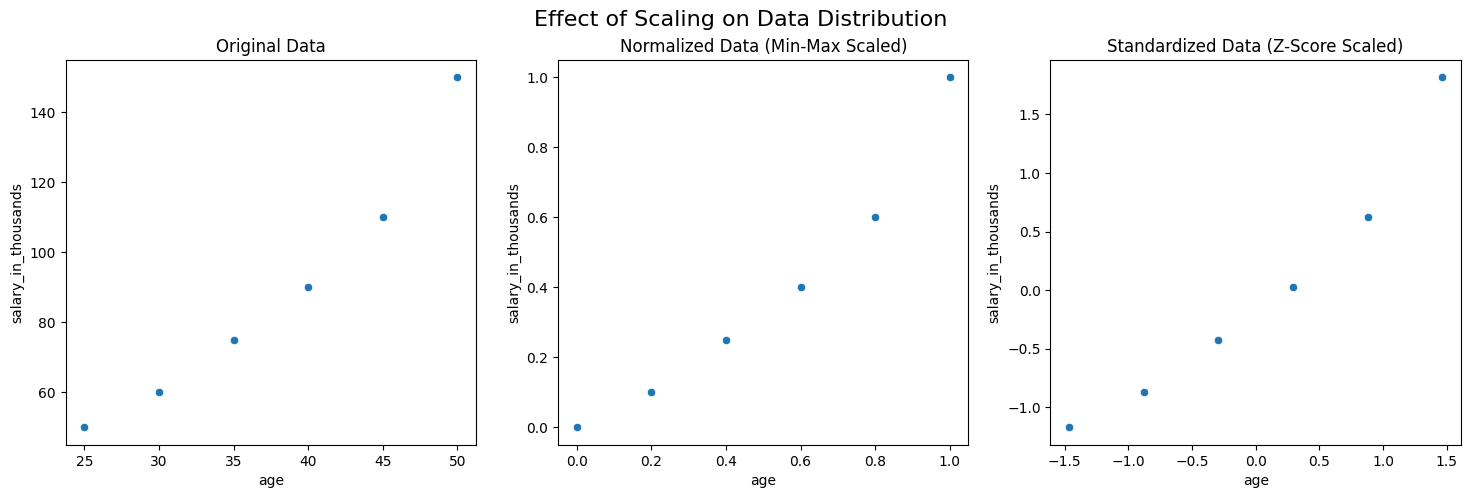

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Effect of Scaling on Data Distribution", fontsize=16)

# १. मूळ डेटा
sns.scatterplot(x='age', y='salary_in_thousands', data=data, ax=axes[0])
axes[0].set_title("Original Data")

# २. नॉर्मलाइज्ड डेटा
sns.scatterplot(x='age', y='salary_in_thousands', data=normalized_df, ax=axes[1])
axes[1].set_title("Normalized Data (Min-Max Scaled)")

# ३. स्टँडर्डाइज्ड डेटा
sns.scatterplot(x='age', y='salary_in_thousands', data=standardized_df, ax=axes[2])
axes[2].set_title("Standardized Data (Z-Score Scaled)")

plt.show()